In [139]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [140]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler# escalamiento a los datos para que los valores se ajusten a ello
from sklearn.linear_model import LinearRegression # modelo de regresión lineal

In [141]:
%matplotlib inline 
sns.set_style(style='whitegrid')
sns.set_context(context='notebook')
plt.rcParams['figure.figsize']=(11,9.4)

In [142]:
data = pd.read_csv('../../data/raw/Advertising.csv')
data.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


1. Eliminamos del conjunto de datos la primer columna que contiene datos que no son útiles

In [143]:
data = data.iloc[:,1:]

2. Buscamos detalles extras del df.

In [144]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


Observamos que existen 200 filas, 4 columnas, no hay valores faltantes, y los datos son de tipo numérico. Y del mismo modo podemos usar describe

In [145]:
data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [146]:
data.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

El objetivo del algoritmo que desarrollemos será para encontrar el valor de la columna ```Sales```, por lo que esta variable sera nuestra columna dependiente y las demás son nuestras variables independientes.

Ahora que sabemos eso podemos comenzar a trabajar en cada una de las columnas, lo primero que haremos sera graficar los datos que podemos encontrar en cada una de ellas.

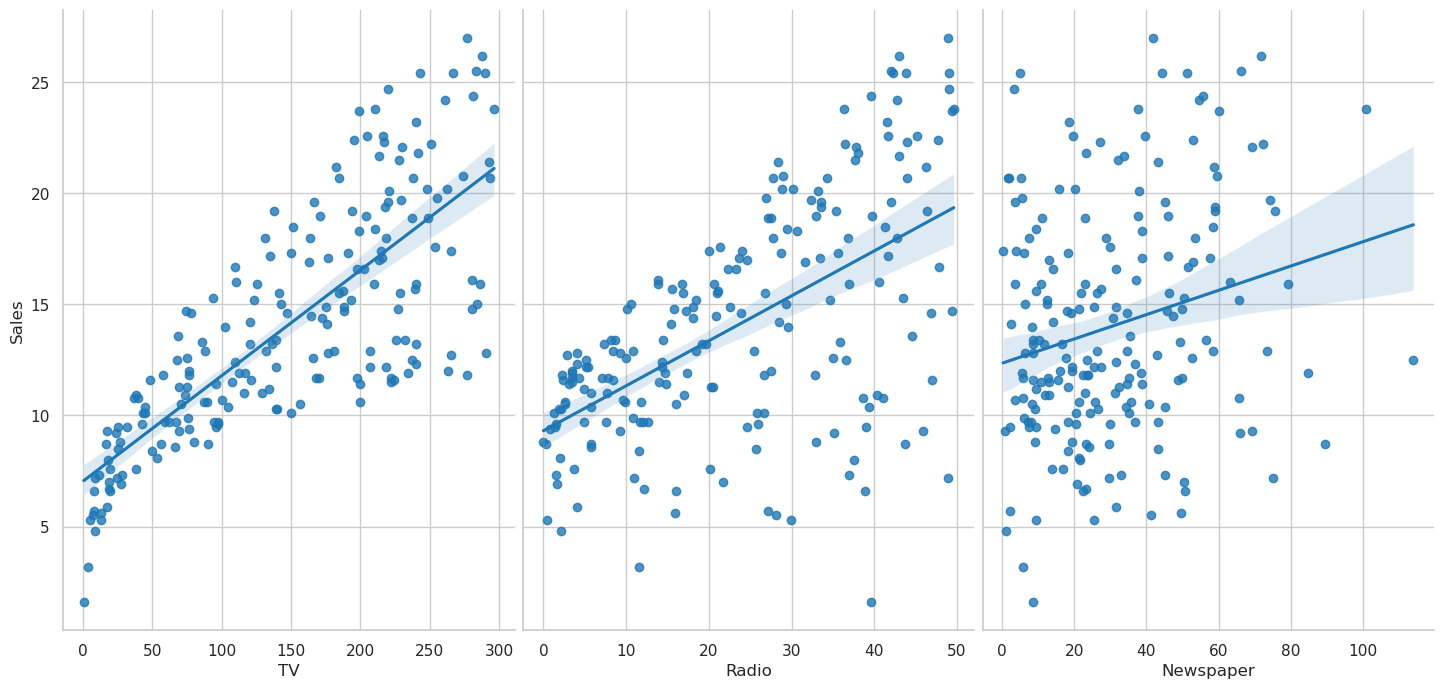

In [147]:
cols=['TV', 'Radio', 'Newspaper']

(
    sns
    .pairplot(
        data, 
        x_vars=cols, 
        y_vars='Sales', 
        height=7, 
        aspect=0.7, 
        kind='reg'
    )
);

## Creación de los modelos de regresión lineal simple

Primero crearemos los modelos de regresión lineal simple utilizando cada una de las variables independientes de nuestro conjunto de datos.

### TV

1. Importamos librerias de sklearn

In [148]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

Utilizamos ```.values.reshape(-1,1)``` porque scikit-learn espera que las características de entrada para el modelo de regresión sean una matriz bidimensional, donde cada fila representa una observación y cada columna representa una característica.

In [149]:
X  = data['TV'].values.reshape(-1,1) # variable independiente
y = data['Sales'].values # variable dependiente

2. Dividimos el conjunto entre el conjunto de entrenamiento y testing

In [150]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

3. Entrenamiento del modelo lineal con los datos

In [151]:
lin_reg = LinearRegression()

#ajustamos modelos 
lin_reg.fit(X_train, y_train)

LinearRegression()

4. Predicción de los valores utilizando el modelo


In [152]:
y_pred = lin_reg.predict(X_test)

print(f'Predicciones: {y_pred[:4]}, valores reales: {y_test[:4]}')

Predicciones: [14.71794394 16.2115484  20.74819743  7.66403631], valores reales: [16.9 22.4 21.4  7.3]


RMSE nos indica cuánto varían en promedio las predicciones del modelo con respecto a los valores reales. Un valor más bajo de RMSE indica una mejor precisión del modelo, ya que significa que las predicciones están más cercanas a los valores reales.

Para poder entender el valor de RMSE debemos de entender primero la escala de los valores con los que estamos trabajando, en este caso nos estamos trabajando con los valores de la columna ```Sales```. En el caso del valor RMSE del modelo tomando en cuenta la variable independiente ```TV``` vemos que el valor mínimo en la columna ```Sales``` es significativamente menor que el RMSE. Esto indica que, en promedio las predicciones tienen un error considerable en comparación con el rango de los datos. En estos casos es útil entender por qué el modelo tiene dificultades para hacer predicciones precisas, especialmente si el error absoluto es grande en relación con los valores mínimos de Sales.

El parámetro ```squared = False``` indica que la función debería devolver la raíz cuadrada del error cuadrático medio en lugar del propio error cuadrático medio. Esto es específico para el cálculo del RMSE en lugar del MSE. Si se omite o se establece en ```True``` (que es el valor por defecto), devolverá el MSE.

5. Verificamos el r_squared y rmse

In [153]:
r_squared = lin_reg.score(X_test, y_test)

rmse = mean_squared_error(y_test, y_pred, squared=False)

print(r_squared, rmse)


0.6766954295627076 3.194472431998898


7. Gráfico de los datos de test contra el modelo

Text(0.5, 0, 'TV')

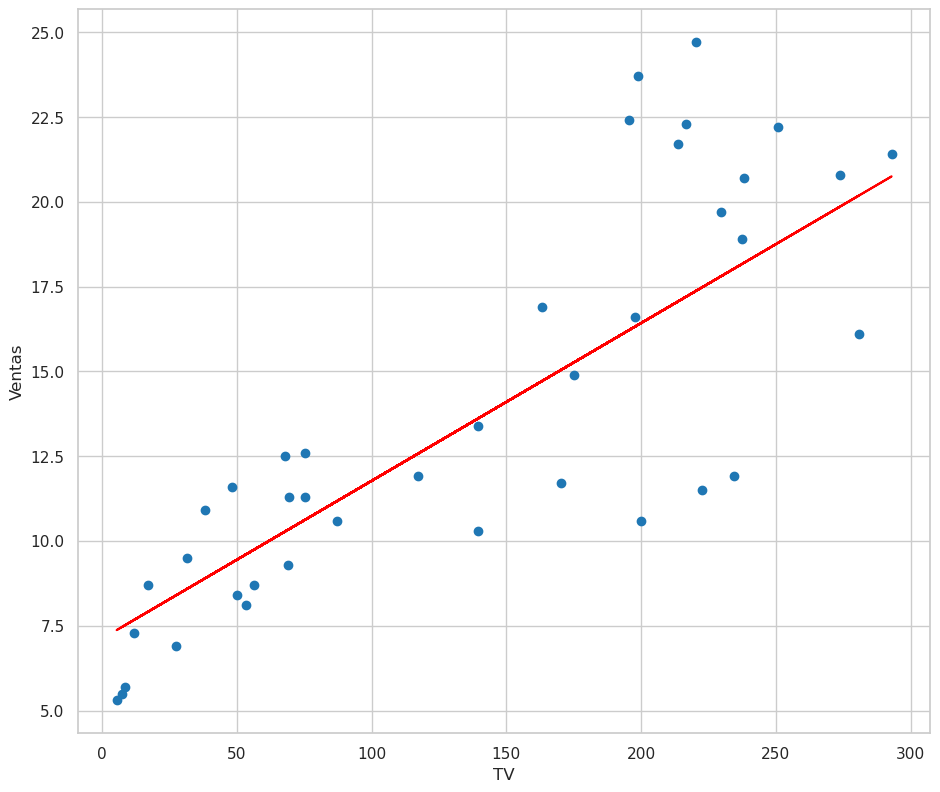

In [154]:
plt.scatter(X_test, y_test)

plt.plot(X_test, y_pred, color='red');

plt.ylabel('Ventas')
plt.xlabel('TV')


### Creamos una función

In [155]:
def simple_model(independant):
    X = data[independant].values.reshape(-1,1)
    y = data['Sales'].values
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    lin_reg = LinearRegression()
    lin_reg.fit(X_train, y_train)
    y_pred = lin_reg.predict(X_test)

    print(f'Predicciones: {y_pred[:4]}, valores reales: {y_test[:4]}')

    r_squared = lin_reg.score(X_test, y_test)

    rmse = mean_squared_error(y_test, y_pred, squared=False)

    print(r_squared, rmse)
    plt.scatter(X_test, y_test)

    plt.plot(X_test, y_pred, color='red');
    plt.ylabel('ventas')
    plt.xlabel(independant)


### Modelo radio

Predicciones: [15.88332197 19.17427219 15.20877938 16.96667826], valores reales: [16.9 22.4 21.4  7.3]
0.2634309396999791 4.8216974799471926


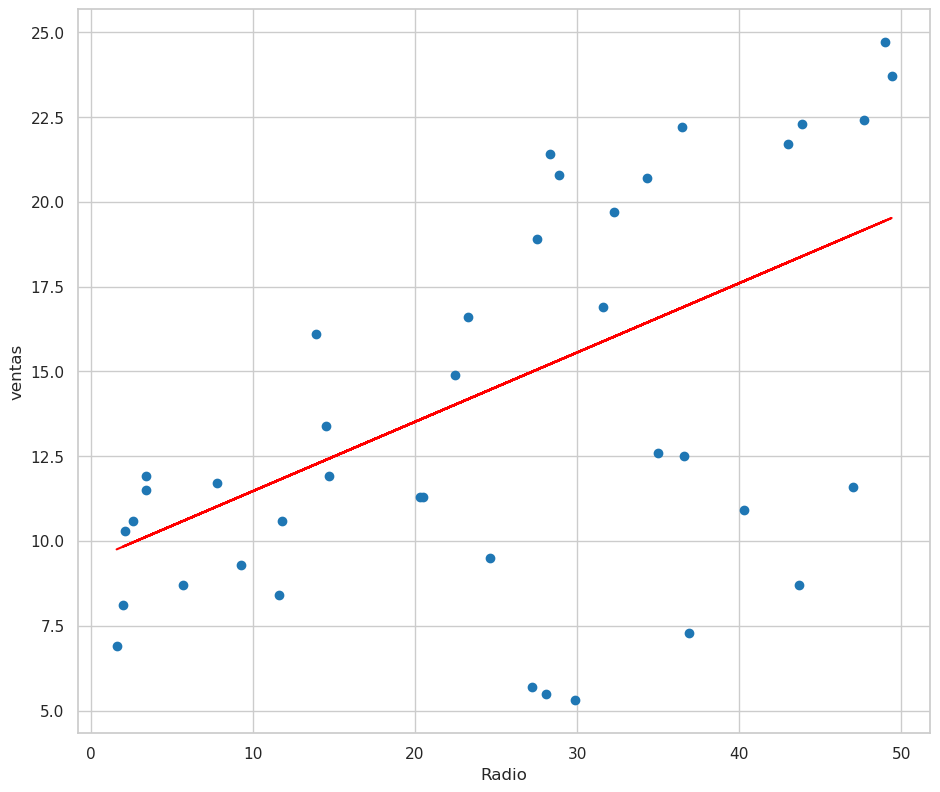

In [156]:
simple_model('Radio')

### Modelo de Newspaper

Predicciones: [15.47167765 15.47167765 14.89203768 15.01155108], valores reales: [16.9 22.4 21.4  7.3]
0.029871749149522397 5.533600454969853


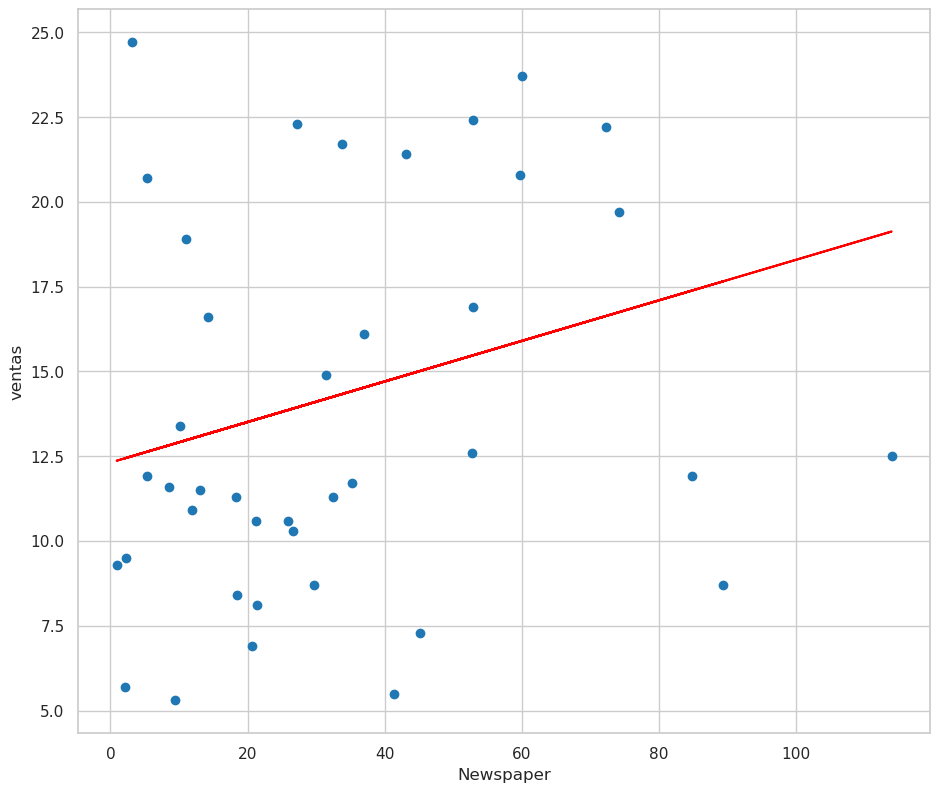

In [157]:
simple_model('Newspaper')

Los resultados obtenidos por cada uno de los modelos son los siguientes:

* TV: **R2**: 0.6766954295627076 **RMSE**: 3.194472431998898
* Radio: **R2**: 0.2634309396999791 **RMSE**: 4.8216974799471926
* Periodico: **R2**: 0.029871749149522397 **RMSE**: 5.533600454969853

Con base a los resultados podemos decir que el mejor modelo cuando utilizamos una sola variable independiente es el de **TV**, seguido por el de **Radio** y el que peor rendimiento muestra es el de **Periódico**.

Conociendo los resultados de los modelos podemos ahora a la creación del modelo de regresión lineal múltiple haciendo distintas combinaciones de las variables del conjunto, con esta combinación de variables veremos si podemos conseguir un modelo que tenga un mejor rendimiento con los datos que se tienen.

### Regresión Lineal Múltiple


### Ventajas y desventajas

### Ventajas

1. **Modelo más completo:** Permite modelar relaciones más complejas al considerar múltiples variables predictoras
2. **Sencilla:** Es una técnica relativamente sencilla de entender y utilizar

### Desventajas

1. **Sensibilidad a Multicolinealidad:** La multicolinealidad (correlación alta entre variables predictoras) puede afectar la estabilidad de los coeficientes estimados.
2. **Puede sufrir Overfitting:** Si se incluyen demasiadas variables predictoras sin justificación, el modelo puede sobreajustarse (overfitting) a los datos de entrenamiento y tener un rendimiento deficiente en nuevos datos.

1. Extracción de las variables independientes y dependiente, en este caso analizaremos si Nespaper y TV tiene mejor rendimiento

In [158]:
X = data.drop(['Radio', 'Sales'], axis=1).values # independiente newspapaer y TV
y = data['Sales'].values # dependiente

2. Dividimos el conjunto entre el conjunto de entrenamiento y testing

In [159]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

3. Entrenamiento del modelo lineal con los datos

In [160]:
lin_reg = LinearRegression()

# ajustamos el modelo
lin_reg.fit(X_train, y_train)

LinearRegression()

4. Predicción de los valores utilizando el modelo


In [161]:
y_pred = lin_reg.predict(X_test)

print(f'Predicciones: {y_pred[:4]}, valores reales: {y_test[:4]}')


Predicciones: [16.00205249 17.4873792  21.45480309  8.555338  ], valores reales: [16.9 22.4 21.4  7.3]


5. calculamos r2 y rmse

In [162]:
r_squared = lin_reg.score(X_test, y_test)

rmse = mean_squared_error(y_test, y_pred, squared=False)

print(r_squared, rmse)

0.649515280538585 3.3260422878644853


6. Ploteamos

<Axes: >

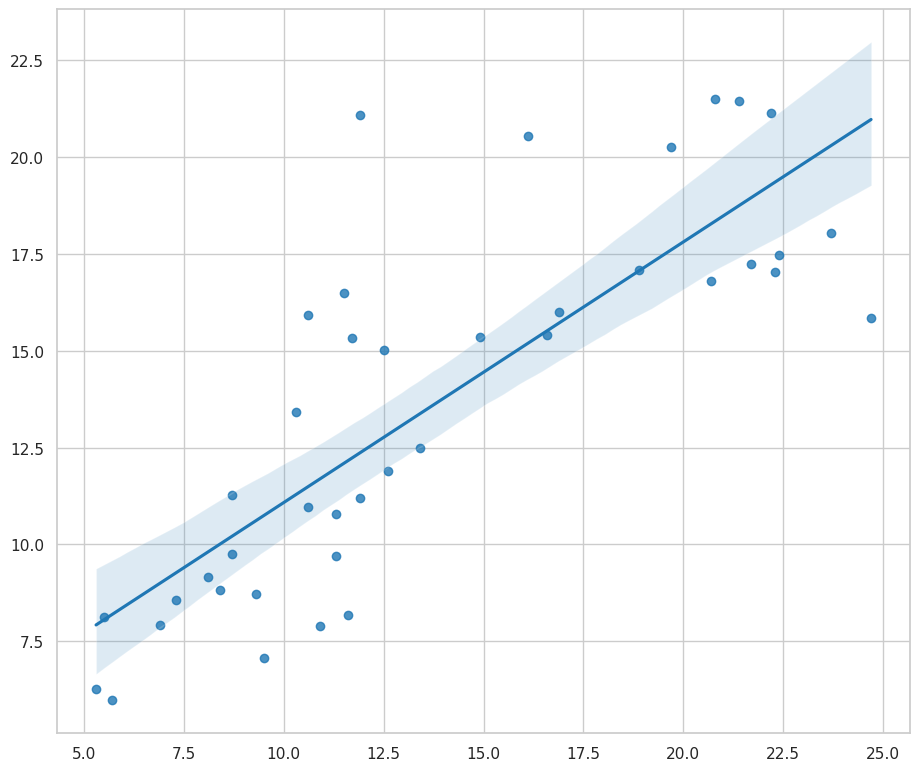

In [163]:
sns.regplot(x = y_test, y = y_pred)

1. Extracción de las variables independientes y dependiente, en este caso analizaremos si Nespaper y TV tiene mejor rendimiento

In [165]:
X = data.drop(['Newspaper', 'Sales'], axis=1).values # valores independientes TV y Radio
y = data['Sales'].values

2. Dividimos el conjunto entre el conjunto de entrenamiento y testing

In [166]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [168]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

In [172]:
y_pred = lin_reg.predict(X_test)
print(f'Predicciones: {y_pred[:4]}, valores reales: {y_test[:4]}')

r_squared = lin_reg.score(X_test, y_test)

rmse = mean_squared_error(y_test, y_pred, squared=False)

print(r_squared, rmse)

Predicciones: [16.35747252 20.86299397 21.52505848 10.58719845], valores reales: [16.9 22.4 21.4  7.3]
0.9005833101920356 1.7714254173033515


<Axes: >

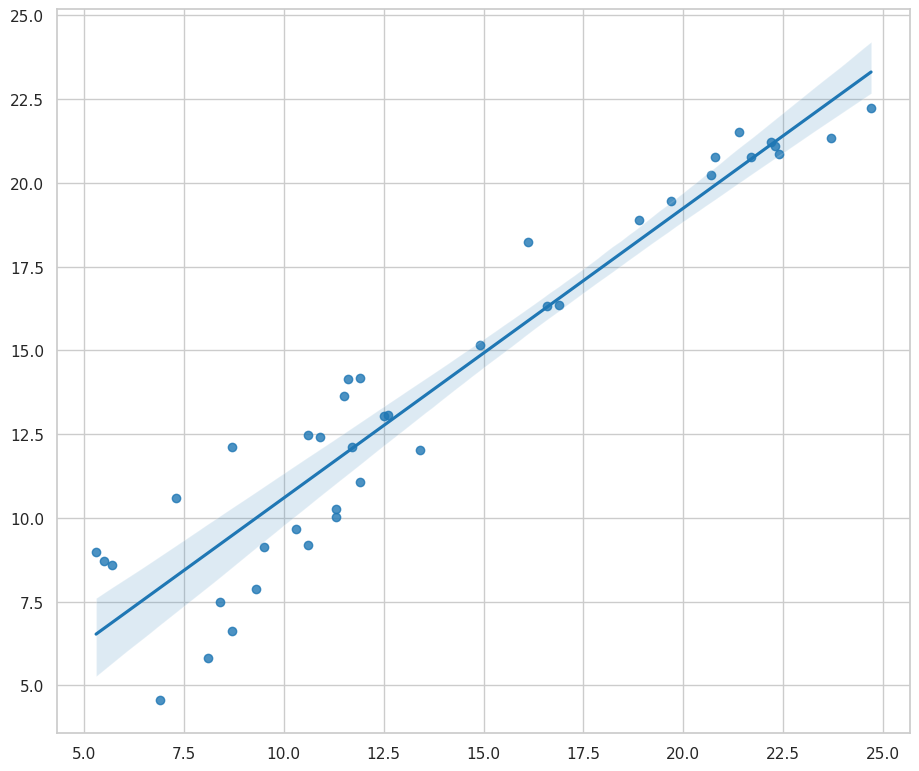

In [173]:
sns.regplot(x = y_test , y=y_pred)

Los resultados obtenidos por cada uno de los modelos son los siguientes:

* TV - Newspaper: R2: 0.649515280538585 RMSE: 3.3260422878644853
* TV - Radio: R2: 0.9005833101920356 RMSE: 1.7714254173033515
Con base a los resultados podemos decir que el mejor modelo cuando utilizamos TV - Radio.